In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from pandas.tools.plotting import scatter_matrix

%matplotlib inline



df = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\gfs_bom_loc_1.csv")


In [40]:
# Setting UtcTime as the index
df.set_index("Unnamed: 0", inplace=True)

In [41]:
# Dropping variables that are not used for training
df = df.drop('index',axis=1)
df = df.drop('ObservationId',axis=1)
df = df.drop('Timestamp',axis=1)
df = df.drop('ParentLocationId',axis=1)
df = df.drop('RelatedLocationId',axis=1)
df = df.drop('ReadingId',axis=1)
df = df.drop('LocalTime',axis=1)
df = df.drop('TimeZone',axis=1)
df = df.drop('WindDirection',axis=1)
df = df.drop('WindDirectionCompass',axis=1)

# Dropping more variables 
# df = df.drop('WindSpeed',axis=1)
# df = df.drop('WindGust',axis=1)
# df = df.drop('RainSince9am',axis=1)
# df = df.drop('RainfallLastHour',axis=1)
# df = df.drop('RainfallLast10Minutes',axis=1)
# df = df.drop('pred_cloud_cover',axis=1)
# df = df.drop('pred_dewp',axis=1)
# df = df.drop('pred_lw_rad',axis=1)
# df = df.drop('pred_merid_wind',axis=1)
# df = df.drop('pred_pe',axis=1)
# df = df.drop('pred_rain_rate',axis=1)
# df = df.drop('pred_soil_moisture_lower',axis=1)
# df = df.drop('pred_soil_moisture_upper',axis=1)
# df = df.drop('pred_sunshine',axis=1)
# df = df.drop('pred_surface_pressure',axis=1)
# df = df.drop('pred_sw_rad',axis=1)
# df = df.drop('pred_temp',axis=1)
# df = df.drop('pred_zonal_wind',axis=1)





# Change units 
df.pred_temp = df.pred_temp - 273.15 # Kelvin to Celsius
df.pred_dewp = df.pred_dewp - 273.15 # Kelvin to Celsius


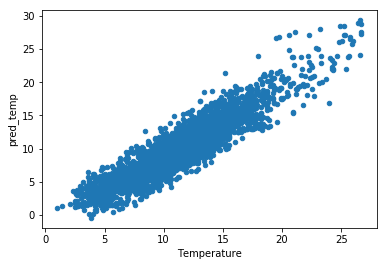

In [42]:
df.plot(kind='scatter', x='Temperature', y='pred_temp');

In [43]:
print df.columns
print 'Total number of columns = %d' %(len(df.columns))

Index([u'Temperature', u'FeelsLike', u'DewPoint', u'RelativeHumidity',
       u'WindSpeed', u'WindGust', u'RainSince9am', u'Pressure',
       u'RainfallLastHour', u'RainfallLast10Minutes', u'pred_cloud_cover',
       u'pred_dewp', u'pred_lw_rad', u'pred_merid_wind', u'pred_pe',
       u'pred_rain_rate', u'pred_soil_moisture_lower',
       u'pred_soil_moisture_upper', u'pred_sunshine', u'pred_surface_pressure',
       u'pred_sw_rad', u'pred_temp', u'pred_zonal_wind'],
      dtype='object')
Total number of columns = 23


In [44]:
# Generate df for gt label (Y)
df_gt_output = pd.DataFrame(df.Temperature)

# Rename dataframe for data matrix (X)
df_data = df

In [45]:
# Add temp for the next 7-days
for hrs in range(1,169):
    col_name = 'y_t_'+str(hrs)
    df_gt_output[col_name] = df_gt_output.Temperature.shift(-hrs)
    # print col_name

# Now remove the current temperature from this dataframe
# df_gt_output = df_gt_output.drop('Temperature', axis=1)

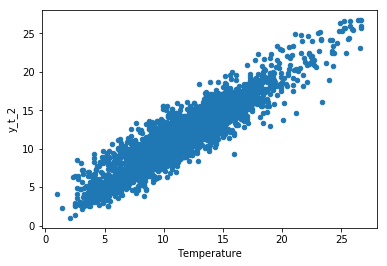

In [87]:
df_gt_output.plot(kind='scatter', x='Temperature', y='y_t_2');

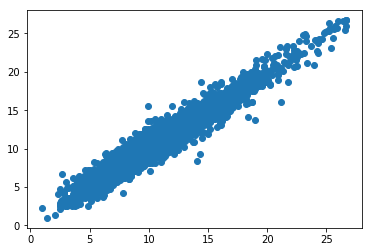

In [88]:
plt.scatter(df_gt_output.Temperature,df_gt_output.y_t_1)

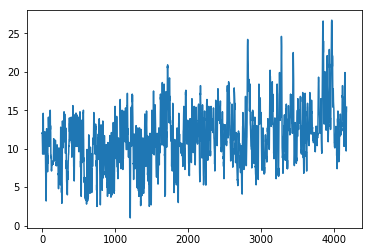

In [70]:
tot_x = len(df_gt_output.Temperature)
plt.plot(range(0,tot_x),df_gt_output.Temperature)

In [71]:
# Get the observation from past one day
past_hours = 50
for current_col in df.columns:
    print 'processing %s' %(current_col)
    for hr in range(1,past_hours):
        col_name = current_col+'_past'+str(hr)+'hr'
        df_data[col_name] = df[current_col].shift(hr)
        print col_name
    

processing Temperature
Temperature_past1hr
Temperature_past2hr
Temperature_past3hr
Temperature_past4hr
Temperature_past5hr
Temperature_past6hr
Temperature_past7hr
Temperature_past8hr
Temperature_past9hr
Temperature_past10hr
Temperature_past11hr
Temperature_past12hr
Temperature_past13hr
Temperature_past14hr
Temperature_past15hr
Temperature_past16hr
Temperature_past17hr
Temperature_past18hr
Temperature_past19hr
Temperature_past20hr
Temperature_past21hr
Temperature_past22hr
Temperature_past23hr
Temperature_past24hr
Temperature_past25hr
Temperature_past26hr
Temperature_past27hr
Temperature_past28hr
Temperature_past29hr
Temperature_past30hr
Temperature_past31hr
Temperature_past32hr
Temperature_past33hr
Temperature_past34hr
Temperature_past35hr
Temperature_past36hr
Temperature_past37hr
Temperature_past38hr
Temperature_past39hr
Temperature_past40hr
Temperature_past41hr
Temperature_past42hr
Temperature_past43hr
Temperature_past44hr
Temperature_past45hr
Temperature_past46hr
Temperature_past47hr

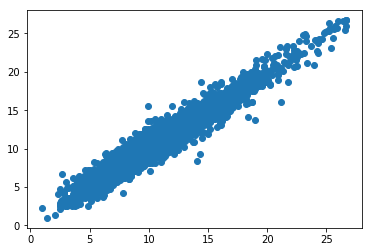

In [82]:
plt.scatter(df_data.Temperature_past1hr,df_gt_output.Temperature)

In [89]:
# df_gt_output.corr()

In [101]:
df_corr_check = pd.DataFrame()
df_corr_check['Temperature'] = df_gt_output.Temperature
df_corr_check['y_t_1'] = df_gt_output.Temperature.shift(1)
df_corr_check['y_t_2'] = df_gt_output.Temperature.shift(2)
df_corr_check['y_t_3'] = df_gt_output.Temperature.shift(3)
df_corr_check['pred_temp'] = df.pred_temp
df_corr_check['pred_temp_tp1'] = df.pred_temp.shift(-1)
df_corr_check['pred_temp_tp2'] = df.pred_temp.shift(-2)
df_corr_check['pred_temp_tp3'] = df.pred_temp.shift(-3)
df_corr_check.dropna(inplace=True)
df_corr_check

,Temperature,y_t_1,y_t_2,y_t_3,pred_temp,pred_temp_tp1,pred_temp_tp2,pred_temp_tp3
Unnamed: 0,,,,,,,,
2016-06-28 17:00:00,11.700000,11.500000,12.100000,12.000000,10.216659,10.149988,10.016656,9.883325
2016-06-28 18:00:00,10.900000,11.700000,11.500000,12.100000,10.149988,10.016656,9.883325,9.749994
2016-06-28 19:00:00,9.800000,10.900000,11.700000,11.500000,10.016656,9.883325,9.749994,10.083327
2016-06-28 20:00:00,9.700000,9.800000,10.900000,11.700000,9.883325,9.749994,10.083327,10.416661
2016-06-28 21:00:00,9.300000,9.700000,9.800000,10.900000,9.749994,10.083327,10.416661,10.749994
2016-06-28 22:00:00,10.400000,9.300000,9.700000,9.800000,10.083327,10.416661,10.749994,11.683333
2016-06-28 23:00:00,10.600000,10.400000,9.300000,9.700000,10.416661,10.749994,11.683333,12.616673
2016-06-29 00:00:00,11.600000,10.600000,10.400000,9.300000,10.749994,11.683333,12.616673,13.550012
2016-06-29 01:00:00,12.600000,11.600000,10.600000,10.400000,11.683333,12.616673,13.550012,12.750004


In [102]:
df_corr_check.corr()

,Temperature,y_t_1,y_t_2,y_t_3,pred_temp,pred_temp_tp1,pred_temp_tp2,pred_temp_tp3
Temperature,1.000000,0.970484,0.922719,0.858735,0.918368,0.878475,0.814933,0.733750
y_t_1,0.970484,1.000000,0.970482,0.922807,0.878473,0.814945,0.733785,0.642654
y_t_2,0.922719,0.970482,1.000000,0.970550,0.814948,0.733807,0.642698,0.548416
y_t_3,0.858735,0.922807,0.970550,1.000000,0.733937,0.642900,0.548691,0.456651
pred_temp,0.918368,0.878473,0.814948,0.733937,1.000000,0.977275,0.921647,0.840827
pred_temp_tp1,0.878475,0.814945,0.733807,0.642900,0.977275,1.000000,0.977266,0.921615
pred_temp_tp2,0.814933,0.733785,0.642698,0.548691,0.921647,0.977266,1.000000,0.977260
pred_temp_tp3,0.733750,0.642654,0.548416,0.456651,0.840827,0.921615,0.977260,1.000000
